# Language Data Collection

Here I collect data on the languages in the FLORES+ dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Initializing Language Data

The FLORES+ dataset can be downloaded [here](https://github.com/openlanguagedata/flores).

In [2]:
from flores import Flores

In [3]:
flores = Flores("../floresp-v2.0-rc.2/")

In [4]:
langs = sorted(flores.langs["dev"])
codes = [lang.split("_")[0] for lang in langs]
scripts = [lang.split("_")[1] for lang in langs]

lang_data = pd.DataFrame({"lang": langs, "iso_code": codes, "script": scripts})

In [7]:
flores.num_langs

{'dev': 212, 'devtest': 205}

In [ ]:
df_sheet = pd.read_csv("flores_langs.csv")
lang_data["variety"] = df_sheet["variety"]
lang_data["name"] = df_sheet["name"]

In [ ]:
lang_data.to_csv("lang_data.csv", index=False)

## Estimated Portion in Training Data

In [3]:
lang_data = pd.read_csv("lang_data.csv")

In [ ]:
train_estimates = (
    pd.read_csv("lang_train_size.csv")
    [["lang", "fraction_total"]]
)

In [ ]:
lang_data = (
    lang_data.merge(train_estimates, on="lang", how="left")
    .rename(columns={"fraction_total": "train_frac_estimate"})
)

In [ ]:
lang_data["train_frac_estimate"] = lang_data["train_frac_estimate"].fillna(0)

In [ ]:
lang_data.to_csv("lang_data.csv", index=False)

## WALS Codes

WALS data can be found [here](https://github.com/cldf-datasets/wals).

In [ ]:
wals_langs = pd.read_csv("wals_langs.csv")[:2662]

In [ ]:
wals_codes = []

for iso in lang_data["iso_code"]:
    wals_code = wals_langs.loc[wals_langs["ISO639P3code"] == iso, "ID"].values
    wals_codes.append(list(wals_code))

wals_codes = [code[0] if len(code) == 1 else code for code in wals_codes]

In [ ]:
lang_data["wals_code"] = wals_codes

In [ ]:
lang_data.to_csv("lang_data.csv", index=False)

## WALS Family & Genus

In [ ]:
lang_data = pd.read_csv("lang_data.csv")

In [ ]:
wals_langs = (
    pd.read_csv("wals_langs.csv")[:2662]
    .rename(columns={"ID": "wals_code", "Family": "family", "Genus": "genus"})
)

In [ ]:
genus_family = wals_langs[["wals_code", "family", "genus"]]
lang_data = lang_data.merge(genus_family, on="wals_code", how="left")

In [ ]:
lang_data.to_csv("lang_data.csv", index=False)

## WALS Features

In [5]:
lang_data = pd.read_csv("lang_data.csv")
wals_feats = pd.read_csv("wals_feats.csv")

In [3]:
# Keep only languages from lang_data
wals_feats = wals_feats[wals_feats["Language_ID"].isin(lang_data["wals_code"])]

In [5]:
# Keep only morphological features (as per Park et al.)
WALS_FEATS = ["20A", "21A", "21B", "22A", "23A", "24A", "25A", "25B", "26A",
              "27A", "28A", "29A", "81A"]

wals_feats = wals_feats[wals_feats["Parameter_ID"].isin(WALS_FEATS)]

In [6]:
# Add morphological features to lang_data
for idx, row in lang_data.iterrows():
    wals_code = row["wals_code"]
    if isinstance(wals_code, float): continue  # Skip rows without a WALS code
    for feat in WALS_FEATS:
        value_id = f"{feat}-{wals_code}"
        values = wals_feats.loc[wals_feats["ID"] == value_id]["Value"].values
        value = values[0] if values else None
        lang_data.loc[idx, feat] = value

/var/folders/_9/cn5fn8814d515j08vlk28lmm0000gn/T/ipykernel_26448/2357179036.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  value = values[0] if values else None
/var/folders/_9/cn5fn8814d515j08vlk28lmm0000gn/T/ipykernel_26448/2357179036.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  value = values[0] if values else None


In [7]:
lang_data

,lang,iso_code,wals_code,script,variety,name,family,genus,d_gen,d_geo,...,is_ud,is_sd,mfh_ud,mfh_sd,-ia_ud,-ia_sd,h_dep_avg,h_codep_avg,train_frac_estimate,81A
0,ace_Arab,ace,ace,Arab,achi1257,Acehnese (Arabic script),Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,7.0
1,ace_Latn,ace,ace,Latn,achi1257,Acehnese (Latin script),Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000477,7.0
2,acm_Arab,acm,arq,Arab,meso1252,Mesopotamian Arabic,Afro-Asiatic,Semitic,1.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.0
3,acq_Arab,acq,NaN,Arab,taiz1242,Taʽizzi-Adeni Arabic,Eastern Sudanic,Eastern Nilotic,1.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
4,aeb_Arab,aeb,atu,Arab,tuni1259,Tunisian Arabic,Afro-Asiatic,Semitic,1.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,yor_Latn,yor,yor,Latn,yoru1245,Yoruba,Niger-Congo,Defoid,1.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003408,2.0
208,yue_Hant,yue,cnt,Hant,xian1255,Yue Chinese (Hong Kong Cantonese),Sino-Tibetan,Chinese,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.514204,NaN,0.000000,2.0
209,zgh_Tfng,zgh,NaN,Tfng,stan1324,Standard Moroccan Tamazight,Eastern Sudanic,Eastern Nilotic,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
210,zsm_Latn,zsm,mly,Latn,stan1306,Standard Malay,Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016844,NaN


## Complexity Measures

[Paper](https://www.degruyter.com/document/doi/10.1515/lingvan-2021-0007/html?lang=en#j_lingvan-2021-0007_ref_059) | [Repository](https://github.com/coltekin/mcomplexity)

In [ ]:
lang_data = pd.read_csv("lang_data.csv")

In [ ]:
compl_scores = (
    pd.read_csv("complexity-scores.txt", sep="\t")
    .rename(columns={"WALS_code": "wals_code"})
    .drop(columns=["treebank"])
    # Average complexity scores for languages with multiple treebanks
    .groupby("wals_code", as_index=False).mean()
)

In [ ]:
lang_data = lang_data.merge(compl_scores, on="wals_code", how="left")

In [ ]:
lang_data.to_csv("lang_data.csv", index=False)

## Type-Token Ratio on FLORES

In [3]:
import json
from typing import Callable

import spacy
from botok import WordTokenizer
from khmernltk import word_tokenize
from lexicalrichness import LexicalRichness
from spacy.lang.zh import Chinese

In [4]:
lang_data = pd.read_csv("lang_data.csv")

In [5]:
SPACY_MAP = json.load(open("spacy_map.json", "r"))

In [6]:
def SpacyTokenizer(sents: list[str], spacy_code: str) -> list[str]:
    """Tokenizer strategy for languages supported by spaCy."""

    if spacy_code == "zh":
        cfg = {"segmenter": "pkuseg"}
        nlp = Chinese.from_config({"nlp": {"tokenizer": cfg}})
        nlp.tokenizer.initialize(pkuseg_model="mixed")
    else:
        nlp = spacy.blank(spacy_code)

    tokens = []
    for sent in sents:
        doc = nlp(sent)
        sent_tokens = [token.text for token in doc]
        tokens.extend(sent_tokens)

    return tokens

In [7]:
def TibtTokenizer(sents: list[str]) -> list[str]:
    """Tokenizer strategy for Tibetan language."""

    tokenizer = WordTokenizer()

    tokens = []
    for sent in sents:
        sent_tokens = [token.text for token in tokenizer.tokenize(sent)]
        tokens.extend(sent_tokens)

    return tokens

In [8]:
def KhmrTokenizer(sents: list[str]) -> list[str]:
    """Tokenizer strategy for Khmer language."""

    tokens = []
    for sent in sents:
        sent_tokens = word_tokenize(sent, return_tokens=True)
        tokens.extend(sent_tokens)

    return tokens

In [9]:
ttr_flores = []    # Type-token ratio
rttr_flores = []   # Root type-token ratio
cttr_flores = []   # Corrected type-token ratio
mattr_flores = []  # Moving average type-token ratio

for lang in lang_data["lang"]:
    path = f"../floresp-v2.0-rc.2/dev/dev.{lang}"
    with open(path, encoding="utf-8") as f:
        if lang in SPACY_MAP:
            sents = f.readlines()
            tokens = SpacyTokenizer(sents, spacy_code=SPACY_MAP[lang])
            lex = LexicalRichness(tokens, preprocessor=None, tokenizer=None)
        elif lang == "bod_Tibt":
            sents = f.readlines()
            tokens = TibtTokenizer(sents)
            lex = LexicalRichness(tokens, preprocessor=None, tokenizer=None)
        elif lang == "khm_Khmr":
            sents = f.readlines()
            tokens = KhmrTokenizer(sents)
            lex = LexicalRichness(tokens, preprocessor=None, tokenizer=None)
        else:
            text = f.read()
            lex = LexicalRichness(text)  # Fall back to LexicalRichness default tokenizer
        ttr_flores.append(lex.ttr)
        rttr_flores.append(lex.rttr)
        cttr_flores.append(lex.cttr)
        mattr_flores.append(lex.mattr(window_size=500))  # Following Park et al.

Loading Trie... (1s.)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/botok/textunits/bostring.py:82: UserWarning: Beware of unexpected results: input string contains the non-expanded char "གྷ", found in "".
  warn(
| 2024-05-28 20:59:00,386 | INFO | khmer-nltk | Loaded model from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


In [10]:
ttr_flores

[0.26775275515093433,
 0.2732366183091546,
 0.47276110985788405,
 0.4683356258596974,
 0.46834947109195724,
 0.2271141946371648,
 0.2721968543886352,
 0.4104115022310362,
 0.4849091016061658,
 0.44994084173756266,
 0.3825104374659648,
 0.4131155303030303,
 0.4566836324671846,
 0.4710661581827226,
 0.4365435570215757,
 0.4068770958641614,
 0.3018677678014116,
 0.21618064409986426,
 0.5081926514399205,
 0.3442423010468544,
 0.42589729431253454,
 0.43129364421825067,
 0.24648698456576826,
 0.2804492986179409,
 0.4061929885114146,
 0.321389346512905,
 0.31098481484770446,
 0.2338007135153074,
 0.3931391518067249,
 0.2861463678098839,
 0.162128751120314,
 0.40257037306831783,
 0.43452914798206277,
 0.3795582139671546,
 0.3035671342685371,
 0.22246626921870097,
 0.22634929645999757,
 0.380997177798683,
 0.4390787518573551,
 0.38086698093871696,
 0.4093196351818849,
 0.24271805600257484,
 0.27631957280755803,
 0.45025225859439166,
 0.22266716722980018,
 0.26739732724902215,
 0.280897082884392

In [11]:
lang_data["ttr_flores"] = ttr_flores
lang_data["rttr_flores"] = rttr_flores
lang_data["cttr_flores"] = cttr_flores
lang_data["mattr_flores"] = mattr_flores

In [12]:
lang_data.to_csv("lang_data.csv", index=False)

## Augmented TTR

In [8]:
# Create "ttr_aug"
ttr_aug = []

# Fill ttr_aug with values from "ttr" if available, otherwise with values from "ttr_flores"
for idx, row in lang_data.iterrows():
    if pd.notna(row["ttr"]):
        ttr_aug.append(row["ttr"])
    else:
        ttr_aug.append(row["ttr_flores"])


In [10]:
for lang, ttr in zip(lang_data["lang"], ttr_aug):
    print(lang, ttr)

ace_Arab 0.2677527551509343
ace_Latn 0.2732366183091546
acm_Arab 0.472761109857884
acq_Arab 0.4683356258596974
aeb_Arab 0.4683494710919572
afr_Latn 0.168628
als_Latn 0.2936806148590948
amh_Ethi 0.5000596089651884
apc_Arab_nort3139 0.4849091016061658
apc_Arab_sout3123 0.4499408417375626
arb_Arab 0.4582166702562998
arb_Latn 0.4131155303030303
ars_Arab 0.4566836324671846
ary_Arab 0.4710661581827226
arz_Arab 0.4365435570215757
asm_Beng 0.4068770958641614
ast_Latn 0.3018677678014116
awa_Deva 0.2161806440998642
ayr_Latn 0.5081926514399205
azb_Arab 0.4240626338002324
azj_Latn 0.4258972943125345
bak_Cyrl 0.4312936442182506
bam_Latn 0.2464869845657682
ban_Latn 0.2804492986179409
bel_Cyrl 0.4061929885114146
bem_Latn 0.321389346512905
ben_Beng 0.3812338779019776
bho_Deva 0.2338007135153074
bjn_Arab 0.3931391518067249
bjn_Latn 0.2861463678098839
bod_Tibt 0.979187314172448
bos_Latn 0.4025703730683178
brx_Deva 0.4345291479820627
bug_Latn 0.3795582139671546
bul_Cyrl 0.3551605
cat_Latn 0.2578375
ceb_L

In [11]:
lang_data["ttr_aug"] = ttr_aug

## Comparison of TTR with Default Tokenizer and with Language Specific Tokenizers

In [29]:
lang_data = pd.read_csv("lang_data.csv")
lang_data_bak = pd.read_csv("lang_data.bak.csv")

In [42]:
ttr_data = (
    lang_data_bak[["lang", "ttr", "ttr_flores"]]
    .dropna()
    .reset_index()
    .drop(columns=["index"])
    .rename(columns={"ttr": "ttr_gold", "ttr_flores": "ttr_simple"})
)

In [45]:
ttr_data = (
    pd.merge(ttr_data, lang_data[["lang", "ttr_flores"]], on="lang", how="left")
    .rename(columns={"ttr_flores": "ttr_complex"})
)

In [46]:
ttr_data

,lang,ttr_gold,ttr_simple,ttr_complex
0,afr_Latn,0.168628,0.251596,0.227114
1,bul_Cyrl,0.355160,0.355773,0.303567
2,cat_Latn,0.257837,0.244440,0.222466
3,ces_Latn,0.408022,0.437593,0.380997
4,cmn_Hans,0.300615,0.947899,0.242718
5,cmn_Hant,0.300615,0.951715,0.276320
6,ekk_Latn,0.490808,0.495716,0.413820
7,ell_Grek,0.248779,0.322230,0.295035
8,eng_Latn,0.213230,0.250288,0.233539
9,eus_Latn,0.376721,0.420188,0.345062


In [51]:
def square_error(x: float, y: float) -> float:
    return (x - y) ** 2

In [53]:
ttr_data["error_simple"] = ttr_data.apply(
    lambda row: square_error(row["ttr_gold"], row["ttr_simple"]), axis=1
)

In [ ]:
ttr_data["error_complex"] = ttr_data.apply(
    lambda row: square_error(row["ttr_gold"], row["ttr_complex"]), axis=1
)

In [55]:
total_error_simple = ttr_data["error_simple"].sum()
total_error_complex = ttr_data["error_complex"].sum()

In [56]:
print(f"Total error (simple): {total_error_simple}")
print(f"Total error (complex): {total_error_complex}")

Total error (simple): 1.5094742816348865
Total error (complex): 0.1429850587636308


<AxesSubplot: xlabel='ttr_gold', ylabel='ttr_simple'>

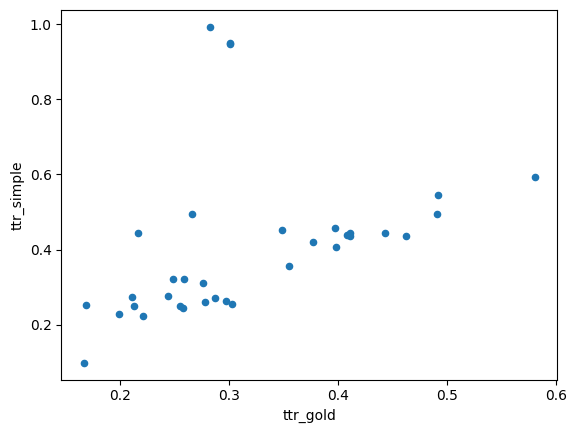

In [48]:
ttr_data.plot.scatter(x="ttr_gold", y="ttr_simple")

<AxesSubplot: xlabel='ttr_gold', ylabel='ttr_complex'>

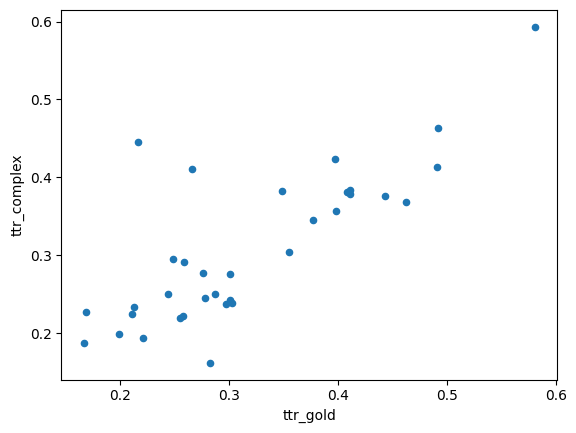

In [49]:
ttr_data.plot.scatter(x="ttr_gold", y="ttr_complex")

In [25]:
ttr_gold

[0.168628,
 0.3551605,
 0.2578375,
 0.4080221666666666,
 0.3006155,
 0.3006155,
 0.4908085,
 0.2487795,
 0.21322975,
 0.3767215,
 0.49185625,
 0.254833,
 0.265816,
 0.2209145,
 0.348783,
 0.302711,
 0.2437408333333333,
 0.2827255,
 0.5807387500000001,
 0.2776345,
 0.210736,
 0.41142625,
 0.286788,
 0.2758895,
 0.4625082499999999,
 0.411039,
 0.397861,
 0.2972225,
 0.2585032499999999,
 0.3973865,
 0.2161355,
 0.4429405,
 0.199242,
 0.1668725]

##  Distances

In [ ]:
git clone https://github.com/antonisa/lang2vec
cd lang2vec
python3 setup.py install

In [2]:
import lang2vec.lang2vec as l2v

In [3]:
lang_data = pd.read_csv("lang_data.csv")

In [4]:
lang_data

,lang,iso_code,wals_code,script,variety,name,family,genus,d_syn,train_frac_estimate,...,lh,lh_sd,is,is_sd,mfh,mfh_sd,-ia,-ia_sd,h_dep_avg,h_codep_avg
0,ace_Arab,ace,ace,Arab,achi1257,Acehnese (Arabic script),Austronesian,Malayo-Sumbawan,0.67,0.000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ace_Latn,ace,ace,Latn,achi1257,Acehnese (Latin script),Austronesian,Malayo-Sumbawan,0.67,0.000477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acm_Arab,acm,arq,Arab,meso1252,Mesopotamian Arabic,Afro-Asiatic,Semitic,0.68,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acq_Arab,acq,NaN,Arab,taiz1242,Taʽizzi-Adeni Arabic,Eastern Sudanic,Eastern Nilotic,0.57,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aeb_Arab,aeb,atu,Arab,tuni1259,Tunisian Arabic,Afro-Asiatic,Semitic,0.93,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,yor_Latn,yor,yor,Latn,yoru1245,Yoruba,Niger-Congo,Defoid,0.61,0.003408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,yue_Hant,yue,cnt,Hant,xian1255,Yue Chinese (Hong Kong Cantonese),Sino-Tibetan,Chinese,0.59,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514204,NaN
209,zgh_Tfng,zgh,NaN,Tfng,stan1324,Standard Moroccan Tamazight,Eastern Sudanic,Eastern Nilotic,0.57,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,zsm_Latn,zsm,mly,Latn,stan1306,Standard Malay,Austronesian,Malayo-Sumbawan,0.79,0.016844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
l2v.DISTANCES

['genetic', 'geographic', 'syntactic', 'inventory', 'phonological', 'featural']

In [ ]:
iso_codes = lang_data["iso_code"].tolist()

for dist_name in l2v.DISTANCES:
    dists = [l2v.distance(dist_name, "eng", iso_code) for iso_code in iso_codes]
    lang_data[f"d_{dist_name[:3]}"] = dists

In [20]:
lang_data.to_csv("lang_data.csv", index=False)

## Word Order Entropy

In [10]:
entropy_data = pd.read_csv("word_order_entropy.csv")

In [16]:
lang_data = pd.read_csv("lang_data.csv")

In [23]:
# Mapping of ISO 639-1 codes to ISO 639-3 codes
ISO_MAP = {"af": "afr", "ar": "ara", "be": "bel", "bg": "bul", "bxr": "bxr",
           "ca": "cat", "cop": "cop", "cs": "ces", "cu": "chu", "da": "dan",
           "de": "deu", "el": "ell", "en": "eng", "es": "spa", "et": "est",
           "eu": "eus", "fa": "fas", "fi": "fin", "fr": "fra", "ga": "gle",
           "gl": "glg", "got": "got", "grc": "grc", "he": "heb", "hi": "hin",
           "hr": "hrv", "hsb": "hsb", "hu": "hun", "id": "ind", "it": "ita",
           "ja": "jpn", "kk": "kaz", "kmr": "kmr", "ko": "kor", "la": "lat",
           "lt": "lit", "lv": "lav", "mr": "mar", "nl": "nld", "no": "nor",
           "pl": "pol", "pt": "por", "ro": "ron", "ru": "rus", "sa": "san",
           "sk": "slk", "sl": "slv", "sme": "sme", "sr": "srp", "sv": "swe",
           "swl": "swl", "ta": "tam", "te": "tel", "tr": "tur", "ug": "uig",
           "uk": "ukr", "ur": "urd", "vi": "vie", "yue": "yue", "zh": "zho"}

In [ ]:
# Dependencies
DEP_COLS = ["adp_Noun", "aux_Verb", "nsubjNOUN_Pred", "nsubjPRON_Pred",
            "objNOUN_Pred", "objPRON_Pred", "oblNOUN_Pred", "oblPRON_Pred",
            "nmodNOUN_Noun", "nmodPRON_Noun", "amod_Noun", "advmod_Verb",
            "advmod_Adj", "cop_Pred", "nummod_Noun", "det_Noun", "advcl_Main",
            "acl_Noun", "ccomp_Main", "csubj_Main", "mark_advcl", "mark_ccomp"]

# Codependencies
CODEP_COLS = ["nsubj_obj", "obj_obl"]

In [19]:
entropy_data["iso_code"] = entropy_data["Lang"].map(ISO_MAP)

In [ ]:
h_dep = entropy_data[[*DEP_COLS, "iso_code"]]  # Dependency entropy
h_codep = entropy_data[[*CODEP_COLS, "iso_code"]]  # Codependency entropy

h_dep["h_dep_avg"] = h_dep.mean(axis=1)
h_codep["h_codep_avg"] = h_codep.mean(axis=1)

In [48]:
lang_data = lang_data.merge(h_dep[["iso_code", "h_dep_avg"]], on="iso_code", how="left")
lang_data = lang_data.merge(h_codep[["iso_code", "h_codep_avg"]], on="iso_code", how="left")

In [51]:
lang_data.to_csv("lang_data.csv", index=False)

## Proportion of Subject-Object Order

In [55]:
so_order_data = pd.read_csv("word_order_gradience/so_order.csv")

In [18]:
lang_data = lang_data.merge(so_order_data[["iso_code", "SO_prop"]], on="iso_code", how="left")

In [9]:
lang_data.to_csv("lang_data.csv", index=False)

In [3]:
lang_data = pd.read_csv("lang_data.csv")

In [5]:
lang_data["SO_prop"] = -lang_data["SO_prop"]

## Head-Finality

In [57]:
# Mapping of Surface Universal Dependencies Directories to ISO 639-3 codes
DIR_MAP = {
    "SUD_Slovak-SNK": "slk",
    "SUD_Finnish-TDT": "fin",
    "SUD_Korean-Kaist": "kor",
    "SUD_Polish-LFG": "pol",
    "SUD_Galician-CTG": "glg",
    "SUD_Czech-CAC": "ces",
    "SUD_Belarusian-HSE": "bel",
    "SUD_Russian-GSD": "rus",
    "SUD_Catalan-AnCora": "cat",
    "SUD_Welsh-CCG": "cym",
    "SUD_Polish-PDB": "pol",
    "SUD_Uyghur-UDT": "uig",
    "SUD_Turkish-Tourism": "tur",
    "SUD_Spanish-GSD": "spa",
    "SUD_Danish-DDT": "dan",
    "SUD_English-GUM": "eng",
    "SUD_Arabic-NYUAD": "arb",
    "SUD_Chinese-GSD": "cmn",
    "SUD_Portuguese-GSD": "por",
    "SUD_Armenian-ArmTDP": "hye",
    "SUD_Norwegian-Nynorsk": "nno",
    "SUD_Lithuanian-HSE": "lit",
    "SUD_Turkish-Kenet": "tur",
    "SUD_Italian-ISDT": "ita",
    "SUD_Swedish-Talbanken": "swe",
    "SUD_Hebrew-HTB": "heb",
    "SUD_Turkish-IMST": "tur",
    "SUD_Spanish-AnCora": "spa",
    "SUD_Norwegian-Bokmaal": "nob",
    "SUD_Czech-FicTree": "ces",
    "SUD_Italian-PoSTWITA": "ita",
    "SUD_French-ParTUT": "fra",
    "SUD_Czech-CLTT": "ces",
    "SUD_Italian-TWITTIRO": "ita",
    "SUD_Dutch-Alpino": "nld",
    "SUD_Faroese-FarPaHC": "fao",
    "SUD_English-ParTUT": "eng",
    "SUD_Icelandic-Modern": "isl",
    "SUD_Japanese-GSD": "jpn",
    "SUD_Dutch-LassySmall": "nld",
    "SUD_Irish-IDT": "gle",
    "SUD_Hungarian-Szeged": "hun",
    "SUD_French-FTB": "fra",
    "SUD_Italian-VIT": "ita",
    "SUD_Russian-SynTagRus": "rus",
    "SUD_Persian-Seraji": "pes",
    "SUD_Serbian-SET": "srp",
    "SUD_Kazakh-KTB": "kaz",
    "SUD_Chinese-GSDSimp": "cmn",
    "SUD_Slovenian-SSJ": "slv",
    "SUD_French-Sequoia": "fra",
    "SUD_Marathi-UFAL": "mar",
    "SUD_Swedish-LinES": "swe",
    "SUD_Finnish-FTB": "fin",
    "SUD_Turkish-BOUN": "tur",
    "SUD_Bulgarian-BTB": "bul",
    "SUD_French-GSD": "fra",
    "SUD_Portuguese-Bosque": "por",
    "SUD_Croatian-SET": "hrv",
    "SUD_English-GUMReddit": "eng",
    "SUD_Romanian-SiMoNERo": "ron",
    "SUD_Indonesian-GSD": "ind",
    "SUD_Indonesian-CSUI": "ind",
    "SUD_Turkish-FrameNet": "tur",
    "SUD_Afrikaans-AfriBooms": "afr",
    "SUD_Tamil-TTB": "tam",
    "SUD_Wolof-WTB": "wol",
    "SUD_English-ESL": "eng",
    "SUD_Persian-PerDT": "pes",
    "SUD_Romanian-RRT": "ron",
    "SUD_Lithuanian-ALKSNIS": "lit",
    "SUD_German-GSD": "deu",
    "SUD_German-HDT": "deu",
    "SUD_Estonian-EDT": "ekk",
    "SUD_Urdu-UDTB": "urd",
    "SUD_Scottish_Gaelic-ARCOSG": "gla",
    "SUD_Galician-TreeGal": "glg",
    "SUD_English-LinES": "eng",
    "SUD_Basque-BDT": "eus",
    "SUD_Greek-GDT": "ell",
    "SUD_Czech-PDT": "ces",
    "SUD_Japanese-BCCWJ": "jpn",
    "SUD_Italian-ParTUT": "ita",
    "SUD_Slovenian-SST": "slv",
    "SUD_Turkish-Penn": "tur",
    "SUD_Telugu-MTG": "tel",
    "SUD_Russian-Taiga": "rus",
    "SUD_Norwegian-NynorskLIA": "nno",
    "SUD_Icelandic-IcePaHC": "isl",
    "SUD_Estonian-EWT": "ekk",
    "SUD_Korean-GSD": "kor",
    "SUD_Vietnamese-VTB": "vie",
    "SUD_Hindi-HDTB": "hin",
    "SUD_Latvian-LVTB": "lvs",
    "SUD_Sanskrit-Vedic": "san",
    "SUD_Maltese-MUDT": "mlt",
    "SUD_Ukrainian-IU": "ukr",
    "SUD_English-EWT": "eng",
    "SUD_Romanian-Nonstandard": "ron",
    "SUD_Arabic-PADT": "arb"
}

In [58]:
head_finality_data = (
    pd.read_csv("word_order_gradience/head_finality.csv")
    .rename(columns={"Head_finality": "head_finality"})
)

In [59]:
head_finality_data["iso_code"] = head_finality_data["Directory"].map(DIR_MAP)

In [62]:
# Average head finality scores for languages with multiple treebanks
head_finality_data = head_finality_data.groupby("iso_code", as_index=False).mean()

/var/folders/_9/cn5fn8814d515j08vlk28lmm0000gn/T/ipykernel_4075/2440116168.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  head_finality_data = head_finality_data.groupby("iso_code", as_index=False).mean()


In [67]:
lang_data = lang_data.merge(
    head_finality_data[["iso_code", "head_finality"]], on="iso_code", how="left"
)

In [69]:
lang_data.to_csv("lang_data.csv", index=False)

## Column Reordering

In [23]:
lang_data = (
    pd.read_csv("lang_data.csv")
    .drop(columns=["ttr_aug"])
)

In [73]:
for col in lang_data.columns:
    print(col)

lang
iso_code
wals_code
script
variety
name
family
genus
d_gen
d_geo
d_syn
d_inv
d_pho
d_fea
20A
21A
21B
22A
23A
24A
25A
25B
26A
27A
28A
29A
81A
ttr_flores
rttr_flores
cttr_flores
mattr_flores
ttr_ud
ttr_sd
msp_ud
msp_sd
ws_ud
ws_sd
wh_ud
wh_sd
lh_ud
lh_sd
is_ud
is_sd
mfh_ud
mfh_sd
-ia_ud
-ia_sd
h_dep_avg
h_codep_avg
SO_prop
head_finality
train_frac_estimate


In [72]:
lang_data = lang_data[[
    # General information
    "lang", "iso_code", "wals_code", "script", "variety", "name", "family",
    "genus",

    # Distances from English in lang2vec
    "d_gen", "d_geo", "d_syn", "d_inv", "d_pho", "d_fea",

    # WALS morphological features following Park et al.
    "20A", "21A", "21B", "22A", "23A", "24A", "25A", "25B", "26A", "27A", "28A", "29A", "81A",

    # Type-token ratios measured by LexicalRichness
    "ttr_flores", "rttr_flores", "cttr_flores", "mattr_flores",

    # Complexity measures from Çöltekin and Rama (2023)
    "ttr_ud", "ttr_sd", "msp_ud", "msp_sd", "ws_ud", "ws_sd", "wh_ud", "wh_sd",
    "lh_ud", "lh_sd", "is_ud", "is_sd", "mfh_ud", "mfh_sd", "-ia_ud", "-ia_sd",

    # Word order entropy from Levshina (2019)
    "h_dep_avg", "h_codep_avg", "SO_prop", "head_finality",

    # Estimated fraction of training data
    "train_frac_estimate"
]]

In [74]:
lang_data.to_csv("lang_data.csv", index=False)

In [2]:
lang_data = pd.read_csv("lang_data.csv")

In [3]:
# Count the number of languages where "wiki_size" is not zero
wiki_size = lang_data["train_frac_estimate"]
num_nonzero = len(wiki_size[wiki_size > 0])
print(num_nonzero)

156


## Cleaning Up for Public Release

In [6]:
lang_data = (
    pd.read_csv("lang_data.csv")
    .drop(columns=["cttr_flores", "ttr_sd", "msp_sd", "ws_sd", "wh_sd", "lh_sd",
                   "is_sd", "mfh_sd", "-ia_sd", "train_frac_estimate"])
    .rename(columns={"ttr_ud": "ttr", "msp_ud": "msp", "ws_ud": "ws", "wh_ud": "wh",
                     "lh_ud": "lh", "is_ud": "is", "mfh_ud": "mfh", "-ia_ud": "-ia",
                     "h_dep_avg": "h_dep", "h_codep_avg": "h_codep"})
)

lang_data["wiki_size"] = lang_data["wiki_size"].replace(0, np.nan)

In [7]:
lang_data

,lang,iso_code,wals_code,script,variety,name,family,genus,d_gen,d_geo,...,wh,lh,is,mfh,-ia,h_dep,h_codep,SO_prop,head_finality,wiki_size
0,ace_Arab,ace,ace,Arab,achi1257,Acehnese (Arabic script),Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ace_Latn,ace,ace,Latn,achi1257,Acehnese (Latin script),Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acm_Arab,acm,arq,Arab,meso1252,Mesopotamian Arabic,Afro-Asiatic,Semitic,1.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1237148.0
3,acq_Arab,acq,NaN,Arab,taiz1242,Taʽizzi-Adeni Arabic,Eastern Sudanic,Eastern Nilotic,1.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aeb_Arab,aeb,atu,Arab,tuni1259,Tunisian Arabic,Afro-Asiatic,Semitic,1.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,yor_Latn,yor,yor,Latn,yoru1245,Yoruba,Niger-Congo,Defoid,1.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34176.0
208,yue_Hant,yue,cnt,Hant,xian1255,Yue Chinese (Hong Kong Cantonese),Sino-Tibetan,Chinese,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,0.514204,NaN,NaN,NaN,142198.0
209,zgh_Tfng,zgh,NaN,Tfng,stan1324,Standard Moroccan Tamazight,Eastern Sudanic,Eastern Nilotic,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2441.0
210,zsm_Latn,zsm,mly,Latn,stan1306,Standard Malay,Austronesian,Malayo-Sumbawan,1.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383058.0


In [8]:
lang_data.to_csv("lang_data_publ.csv", index=False)